<h2><u>Machine Learning And NLP</u></h2>

# Module 4 - Mathematical And Bayesian Models

## Demo 3 : Support Vector Machine

In this demo, you will learn how to apply SVM algorithm in Python using scikit-learn library

---

## Problem Statement

Given details of loan application predict the loan will be granted or not.

---

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

---

## Dataset

Dataset includes details of different loan applications along with the application status:

- __Loan_ID__: LP001002(Application ID)
- __Gender__: Male/Female
- __ApplicantIncome__: Monthly income of the applicant
- __LoanAmount__: Amount to be loaned
- __Loan_Status__: Either the application has been accepted or not(Y/N)


<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Data</h3></li></ul>
</div>

In [2]:
loan_data=pd.read_csv('loan_grant.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,NaN,Y
1,LP001003,Male,4583,128.0,N
2,LP001005,Male,3000,66.0,Y
3,LP001006,Male,2583,120.0,Y
4,LP001008,Male,6000,141.0,Y


In [4]:
#Dataset shape to get number of rows and columns
loan_data.shape

(614, 5)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Number of rows and columns in the dataset</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Datatypes</h3></li></ul>
</div>

In [5]:
loan_data.dtypes

Loan_ID             object
Gender              object
ApplicantIncome      int64
LoanAmount         float64
Loan_Status         object
dtype: object

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [6]:
#Checking for null values
loan_data.isnull().sum()

Loan_ID             0
Gender             13
ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

In [7]:
loan_data.isna().sum()

Loan_ID             0
Gender             13
ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Some of the columns have null data</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Treating Null values</h3></li></ul>
</div>

In [8]:
gender=[]
val=loan_data.Gender.mode()
for i in loan_data.Gender:
    if type(i)==np.float:
        gender.append(val)
    else:
        gender.append(i)
loan_data.Gender=gender

In [9]:
loan_data.LoanAmount=loan_data.LoanAmount.fillna(loan_data.LoanAmount.mean())

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Replacing categorical null values with mode and continous null values with mean</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Check Null values</h3></li></ul>
</div>

In [10]:
loan_data.isnull().sum()

Loan_ID            0
Gender             0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

<div style="background-color:##EDF9FF">
  <ul><li><h3>Check NA values</h3></li></ul>
</div>

In [11]:
loan_data.isna().sum()

Loan_ID            0
Gender             0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Treated the null values</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [12]:
Target_ratio=loan_data.Loan_Status.value_counts()/len(loan_data)
print(Target_ratio)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


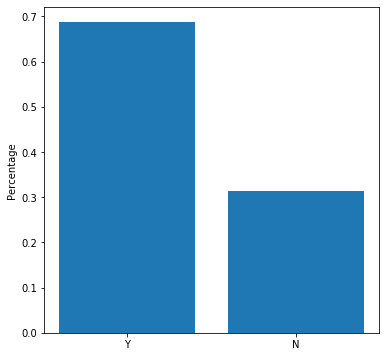

In [13]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has around 31% of entries where loan application was not accepted.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Target Vairable</h3></li></ul>
</div>

In [14]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(loan_data.Loan_Status)
loan_data.Loan_Status=lb.transform(loan_data.Loan_Status)


<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [15]:
#Divide the dataset into independent and dependent variables
X=loan_data[['ApplicantIncome','LoanAmount']]
y=loan_data.Loan_Status

In [16]:
scl=RobustScaler()
X=scl.fit_transform(X)

In [17]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,
                                            test_size=0.4) #40 percent of data will be used for testing purpose

## Support Vector Machine

Some important hyperparameters that should be considered before training the model:
- __C__: Regularization parameter which a float value and is __1.0__ by default. Must be strictly positive.
- __kernel__: Specifies the kernel type to be used in the algorithm. `‘linear’, ‘poly’, ‘rbf’`
- __degree__: An optional integer value to specify the degree of polynomial kernel fucntion which is ignored by all other kernels.
- __gamma__: Kernel coefficient for `'rbf','poly'`
- __coef0__: Independent term in kernel function which is significant in `'poly'`.

For further information about other parameter you can refer to: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>SVC scikit-learn</a>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Linear SVM</h3></li></ul>
</div>

In [18]:
svc_loan=SVC(C=10,kernel='linear')

In [19]:
svc_loan.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Accuracy Score

In [20]:
pred=svc_loan.predict(X_test)
acc_svc_loan=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_svc_loan)

Accuracy Score:  0.6951219512195121


<div style="background-color:##EDF9FF">
  <ul><li><h3>Gaussian RBF</h3></li></ul>
</div>

In [21]:
svc_loan=SVC(C=10,kernel='rbf',gamma=2)

In [22]:
svc_loan.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Accuracy Score

In [23]:
pred=svc_loan.predict(X_test)
acc_svc_loan=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_svc_loan)

Accuracy Score:  0.6788617886178862


<b><i>Conclusion</i></b>: In this demonstration, we have gained an understanding of how to apply SVM algorithm.